In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')

# **0. 데이터 준비**

- **행정구** 단위까지 구분되어 있는 데이터로 군집화 수행

In [3]:
df = pd.read_csv("./datasets/final2.csv",encoding ="euc-kr")
df.head(10)

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,301,79,3,65,37,340,7,3,0,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,174,56,1,25,29,270,2,3,1,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,102,56,4,22,13,213,4,3,0,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,188,55,2,36,27,328,4,5,0,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,146,48,1,27,18,252,0,5,0,...,54,19106,27057,204193,134898,60985,54511,500750,9,2
5,광진구,185,38,3,26,21,221,2,4,0,...,54,17359,25131,123028,106294,45120,34141,351073,11,4
6,구로구,163,45,0,13,19,280,5,6,1,...,54,25890,29422,119016,133415,60825,48002,416570,13,5
7,금천구,122,30,1,34,12,178,3,6,0,...,54,11848,14124,77606,76374,36827,27093,243872,4,2
8,노원구,136,45,0,20,16,307,3,3,0,...,53,29100,49687,133684,166527,71351,59337,509686,16,6
9,도봉구,95,40,2,41,13,184,2,6,0,...,53,15953,23787,79509,100618,51773,43244,314884,8,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             25 non-null     object 
 1   갈비/삼겹살          25 non-null     int64  
 2   곱창/양구이전문        25 non-null     int64  
 3   기사식당            25 non-null     int64  
 4   기타고기요리          25 non-null     int64  
 5   냉면집             25 non-null     int64  
 6   닭/오리요리          25 non-null     int64  
 7   돌솥/비빕밥전문점       25 non-null     int64  
 8   두부요리전문          25 non-null     int64  
 9   버섯전문점           25 non-null     int64  
 10  별식/퓨전요리         25 non-null     int64  
 11  보리밥전문           25 non-null     int64  
 12  부대찌개/섞어찌개       25 non-null     int64  
 13  부페              25 non-null     int64  
 14  분식              25 non-null     int64  
 15  설렁탕집            25 non-null     int64  
 16  순두부전문           25 non-null     int64  
 17  쌈밥전문            25 non-null     int64

- 총 71개의 컬럼, 25개의 데이터(행, 행정구 단위)
    - 음식 업종 수(33개) + 변수(38개)
- 결측치는 존재하지 않는다.

# **1. 데이터 선택 & EDA**

In [5]:
### 분식 업종만 선택

bunsik = pd.concat([df.iloc[:,0],df.iloc[:,14],df.iloc[:,34:]],axis = 1)
bunsik.head()

,행정구,분식,총생활인구수_평일,10대 미만 생활인구_평일,10대 생활인구_평일,20~30대 생활인구_평일,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,751,2.049828e+07,1.219102e+06,1.989315e+06,7.353311e+06,6.772562e+06,1.644169e+06,1.519817e+06,1.694812e+07,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,439,1.181135e+07,1.002138e+06,1.215699e+06,3.062175e+06,3.721769e+06,1.422661e+06,1.386905e+06,1.206012e+07,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,312,6.666287e+06,4.432063e+05,5.618048e+05,1.753008e+06,2.060718e+06,8.383629e+05,1.009187e+06,6.967055e+06,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,519,1.285747e+07,1.006538e+06,1.045185e+06,4.138328e+06,3.929851e+06,1.365295e+06,1.372272e+06,1.278144e+07,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,417,1.093507e+07,5.414203e+05,7.535122e+05,4.559442e+06,2.941770e+06,1.031023e+06,1.107899e+06,1.131414e+07,...,54,19106,27057,204193,134898,60985,54511,500750,9,2


In [6]:
### 상관계수
# 각 변수들과 업소 수 간의 상관관계 파악

bunsik_corr = pd.DataFrame(bunsik.corr().iloc[0,1:])
bunsik_corr['절댓값'] = bunsik_corr.abs() # 상관계수 절댓값
bunsik_corr = bunsik_corr.sort_values(by = '절댓값',ascending = False).reset_index(drop = False)
bunsik_corr.columns = ['변수','상관계수','절댓값']
bunsik_corr

,변수,상관계수,절댓값
0,40~50대 생활인구_평일,0.922324,0.922324
1,총생활인구수_평일,0.910378,0.910378
2,20~30대 생활인구_평일,0.867541,0.867541
3,40~50대 생활인구_주말,0.838176,0.838176
4,총생활인구수_주말,0.826119,0.826119
5,10대 생활인구_주말,0.792531,0.792531
6,평균소득금액,0.786651,0.786651
7,60대 생활인구_평일,0.785354,0.785354
8,20~30대 생활인구_주말,0.781049,0.781049
9,10대 생활인구_평일,0.774321,0.774321


### **1-1. 변수 선택**
- 각 데이터셋에서 상관계수가 높은 변수들을 적정 개수만큼 선택
- 상위 10개 변수 선택
    - 생활인구: 2개
    - 대학정보: 1개
    - 초중고학교정보: 2개
    - 소득정보: 1개
    - 상권변화지표: 1개
    - 주민등록인구: 2개
    - 지하철: 1개

In [7]:
bunsik_variables = list(bunsik_corr.iloc[[0,1,6,12,15,16,20,22,30,33]]['변수'])
bunsik_variables

['40~50대 생활인구_평일',
 '총생활인구수_평일',
 '평균소득금액',
 '10대',
 '역(전체)',
 '고등학교',
 '초중고(전체)',
 '총인구',
 '폐업점포영업개월',
 '대학교(전체)']

In [8]:
### 군집분석에 활용할 데이터 가공

df2 = bunsik.iloc[:, (i for i,x in enumerate(bunsik.columns) if x in bunsik_variables)]
df_bunsik = pd.concat([bunsik.iloc[:,0:2],df2],axis = 1)
df_bunsik.head()

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,751,2.049828e+07,6.772562e+06,1,76,22,12484.671288,51,60155,534988,33
1,강동구,439,1.181135e+07,3.721769e+06,0,60,14,6100.191842,52,39020,464490,12
2,강북구,312,6.666287e+06,2.060718e+06,1,34,7,3581.261923,52,20362,298622,11
3,강서구,519,1.285747e+07,3.929851e+06,2,80,23,5034.876000,52,43165,575813,23
4,관악구,417,1.093507e+07,2.941770e+06,1,55,17,5369.149682,54,27057,500750,9


### **1-2. 데이터 분포 확인**
- 히스토그램을 통해 각 칼럼의 값 분포도 확인

#### **a) 생활인구 데이터**

(array([4., 4., 6., 4., 4., 1., 0., 0., 1., 1.]),
 array([ 5400775.3084 ,  6910525.30335,  8420275.2983 ,  9930025.29325,
        11439775.2882 , 12949525.28315, 14459275.2781 , 15969025.27305,
        17478775.268  , 18988525.26295, 20498275.2579 ]),
 <BarContainer object of 10 artists>)

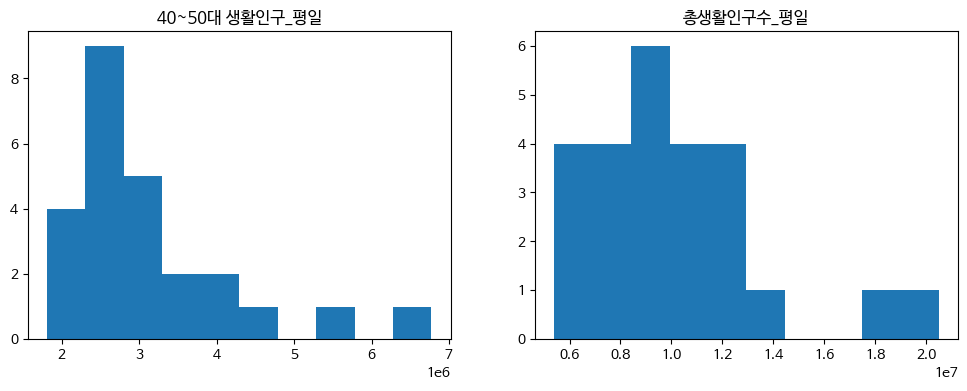

In [9]:
fig,(ax1,ax2) = plt.subplots(figsize = (12,4),nrows = 1,ncols = 2)
ax1.set_title('40~50대 생활인구_평일')
ax1.hist(df_bunsik['40~50대 생활인구_평일'])

ax2.set_title('총생활인구수_평일')
ax2.hist(df_bunsik['총생활인구수_평일'])

    - 왜곡된 데이터 값 분포도를 가지고 있다.
    - 특정 범위에 값이 몰려 있어서 왜곡 정도가 매우 심하다.

#### **b) 대학정보**

(array([4., 7., 4., 5., 0., 2., 0., 2., 0., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

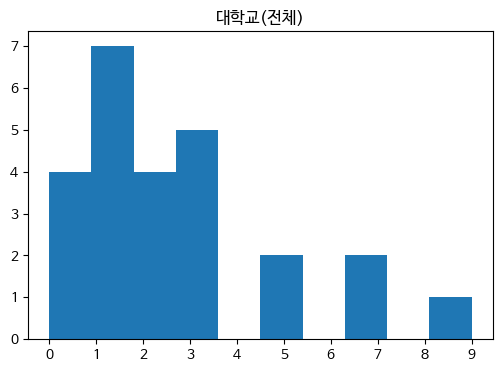

In [10]:
fig = plt.figure(figsize = (6,4))
plt.title('대학교(전체)')
plt.xticks(np.arange(0,10))
plt.hist(df_bunsik['대학교(전체)'])

    - 특정 범위에 값이 몰려 있어서 왜곡 정도가 매우 심하다.

#### **c) 초중고학교정보**

(array([4., 3., 7., 1., 4., 1., 2., 0., 2., 1.]),
 array([ 6. ,  7.9,  9.8, 11.7, 13.6, 15.5, 17.4, 19.3, 21.2, 23.1, 25. ]),
 <BarContainer object of 10 artists>)

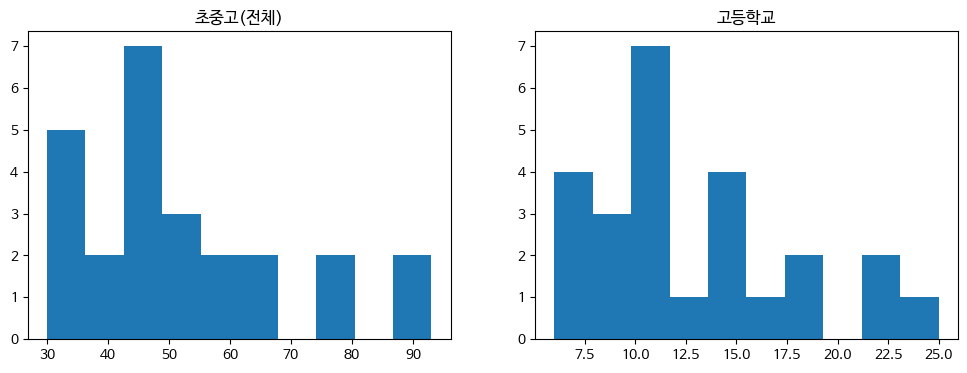

In [11]:
fig,(ax1,ax2) = plt.subplots(figsize = (12,4),nrows = 1,ncols = 2)
ax1.set_title('초중고(전체)')
ax1.hist(df_bunsik['초중고(전체)'])

ax2.set_title('고등학교')
ax2.hist(df_bunsik['고등학교'])

    - 초중고등학교 전체 개수에 대한 데이터는 왜곡된 분포를 띄고 있다.
    - 고등학교 개수 데이터는 왜곡된 분포를 띄고 있다.

#### **d) 소득정보**

(array([10.,  7.,  5.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 3581.26192308,  4471.60285954,  5361.94379601,  6252.28473247,
         7142.62566894,  8032.9666054 ,  8923.30754187,  9813.64847833,
        10703.9894148 , 11594.33035126, 12484.67128773]),
 <BarContainer object of 10 artists>)

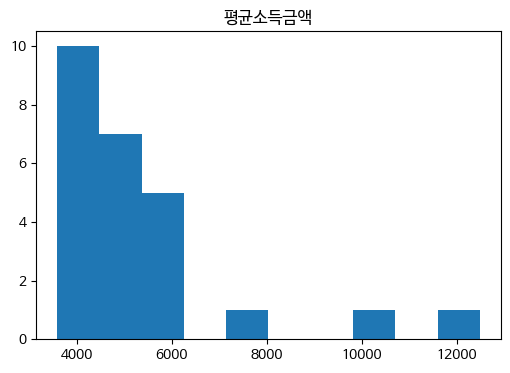

In [12]:
fig = plt.figure(figsize = (6,4))
plt.title('평균소득금액')
plt.hist(df_bunsik['평균소득금액'])

    - 왜곡된 데이터 분포를 보인다.

#### **e) 상권변화지표**

(array([6., 3., 6., 2., 2., 4., 0., 0., 0., 2.]),
 array([51. , 52.5, 54. , 55.5, 57. , 58.5, 60. , 61.5, 63. , 64.5, 66. ]),
 <BarContainer object of 10 artists>)

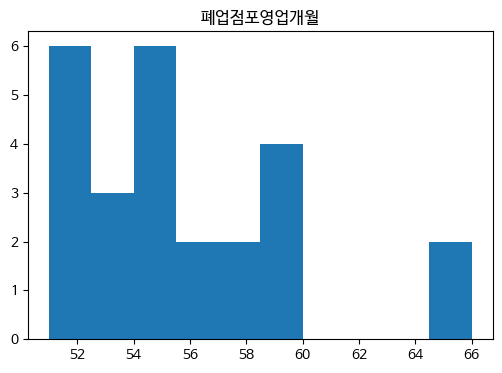

In [13]:
fig = plt.figure(figsize = (6,4))
plt.title('폐업점포영업개월')
plt.hist(df_bunsik['폐업점포영업개월'])

    - 왜곡된 데이터 분포를 가지고 있다.

#### **f) 주민등록인구**

(array([2., 1., 2., 3., 5., 5., 3., 2., 1., 1.]),
 array([130764. , 184272.3, 237780.6, 291288.9, 344797.2, 398305.5,
        451813.8, 505322.1, 558830.4, 612338.7, 665847. ]),
 <BarContainer object of 10 artists>)

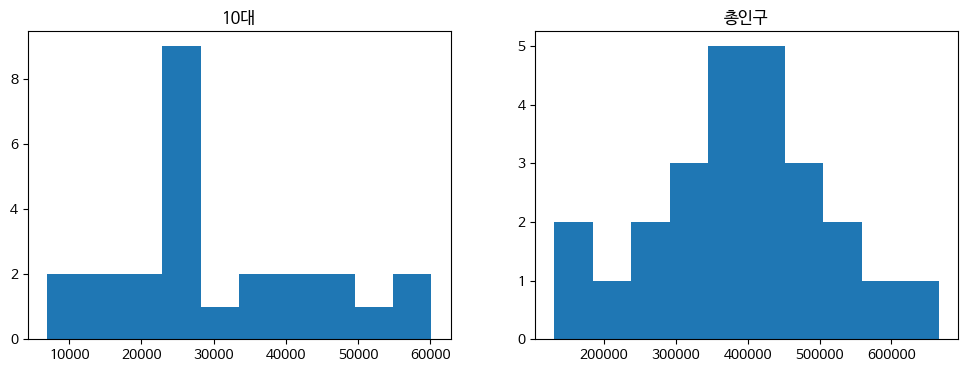

In [14]:
fig,(ax1,ax2) = plt.subplots(figsize = (12,4),nrows = 1,ncols = 2)
ax1.set_title('10대')
ax1.hist(df_bunsik['10대'])

ax2.set_title('총인구')
ax2.hist(df_bunsik['총인구'])

    - 총인구 데이터는 상당히 고른 데이터 분포를 보인다.
    - 10대 인구 데이터는 왜곡된 분포를 보인다.

#### **g) 지하철**

(array([2., 3., 3., 5., 2., 5., 3., 1., 0., 1.]),
 array([ 4. ,  6.9,  9.8, 12.7, 15.6, 18.5, 21.4, 24.3, 27.2, 30.1, 33. ]),
 <BarContainer object of 10 artists>)

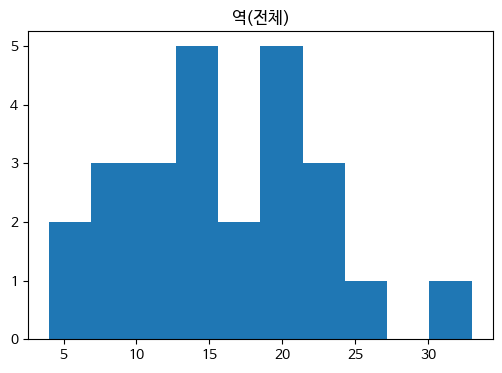

In [15]:
fig = plt.figure(figsize = (6,4))
plt.title('역(전체)')
plt.hist(df_bunsik['역(전체)'])

    - 왜곡된 데이터 분포를 가지고 있다.

### **1-3. 데이터 세트의 왜곡 정도 낮추기**
- Scipy의 stats 모듈의 **skew()** 함수를 이용해 추출
- 반환 값이 1 이상인 경우 왜곡 정도가 높다고 판단
    - 상황에 따라 편차는 존재함
    - 1 이상의 값을 반환하는 피처만 추출해 왜곡 정도를 완화하기 위해 **로그 변환**을 적용

In [16]:
### 데이터 왜곡 정도 확인
# 왜곡 정도가 1 이상인 컬럼들만 추출

from scipy.stats import skew

features_idx = df_bunsik.dtypes[df_bunsik.dtypes != 'object'].index
skew_features = df_bunsik[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

skew_features_top = skew_features[skew_features > 1]
print()
print(skew_features_top.sort_values(ascending = False))

전체 왜곡 정도: 1.064868

평균소득금액            2.257700
40~50대 생활인구_평일    1.631611
분식                1.413682
총생활인구수_평일         1.388110
폐업점포영업개월          1.224739
대학교(전체)           1.211515
dtype: float64


In [17]:
### Box-Cox 변환 적용
# 데이터를 변환하기 위해서는 데이터가 양수여야 함
# 따라서, 모든 데이터에 1을 더해준 후 로그 변환 수행
from scipy import stats

skewed = list(skew_features_top.index)

for ftr in skewed:
    # boxcox() 실행 결과 변환값과 최적 람다 값을 동시에 반환됨
    df_bunsik[ftr] = stats.boxcox(df_bunsik[ftr] + 1)[0] 

df_bunsik.head()

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,1.381091,1.657490,0.968285,0.687292,76,22,0.49936,0.127678,60155,534988,33
1,강동구,1.375458,1.657464,0.968285,0.000000,60,14,0.49936,0.127678,39020,464490,12
2,강북구,1.370573,1.657428,0.968285,0.687292,34,7,0.49936,0.127678,20362,298622,11
3,강서구,1.377451,1.657469,0.968285,1.083951,80,23,0.49936,0.127678,43165,575813,23
4,관악구,1.374796,1.657460,0.968285,0.687292,55,17,0.49936,0.127678,27057,500750,9


- 데이터가 제대로 변환되었음을 확인할 수 있다.

In [18]:
### 데이터 왜곡 정도 재확인

features_idx = df_bunsik.dtypes[df_bunsik.dtypes != 'object'].index
skew_features = df_bunsik[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 0.271492


- 데이터의 왜곡 정도가 1.064868에서 0.271492로 완화됨

### **1-4. 스케일 조정**
- 데이터의 패턴이 결과에 직접적으로 영향을 미치는 비지도학습의 경우 데이터 스케일링이 선행되는 것이 권장된다.
- 피처 스케일링 방법 중 '표준화' 진행
    - StandardScaler로 평균과 표준편차를 재조정

In [19]:
### 데이터 스케일링

from sklearn.preprocessing import StandardScaler

feature_df = df_bunsik.iloc[:,1:] # feature data

# 표준화
scaler = StandardScaler()
bunsik_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구 컬럼 결합
bunsik_std = pd.concat([pd.DataFrame(df_bunsik[['행정구']]),bunsik_std],axis = 1)
bunsik_std.head(3) # 표준화된 데이터 확인

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886


- 제대로 변환된 것을 확인할 수 있다.

# **2. K-Means 군집화**

In [20]:
from sklearn.cluster import KMeans

### **2-1. 군집 개수 정하기**

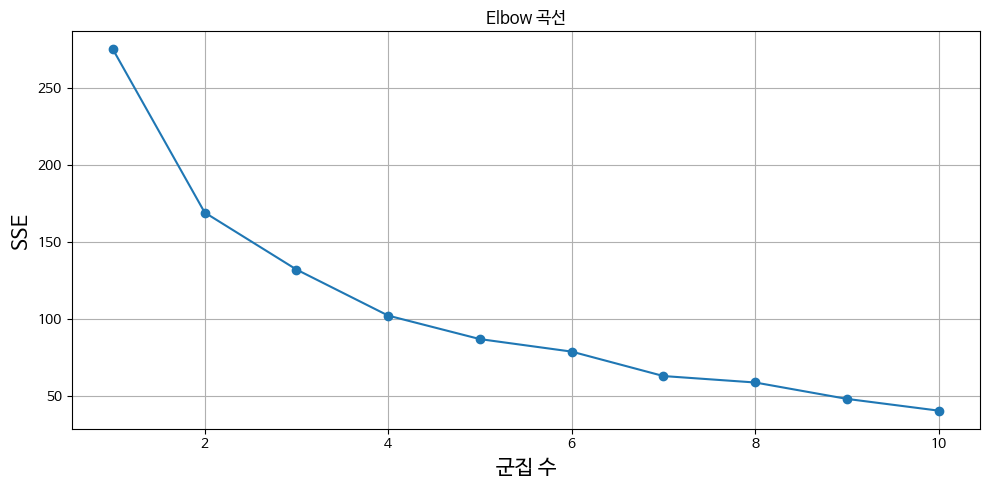

In [21]:
### Inertia, Elbow 구하기

# 중심점 - 데이터 거리를 합산한 inertia(sse)를 빈 array로 생성
sse = []

# 반복문을 실행하며 군집 개수 1~10까지 kmeans를 실행 => sse array에 추가
for i in range(1, 11) :
    km = KMeans(n_clusters = i, # 군집화 할 개수
               init = 'k-means++', # 초기에 군집 중심점의 좌표를 설정할 방식
               n_init = 10,
               max_iter = 300, # 최대 반복 횟수
               random_state = 0)
    km.fit(bunsik_std.iloc[:,1:]) # '행정구' 컬럼 제거
    sse.append(km.inertia_)

# sse array 시각화   
plt.figure(figsize = (10,5))
plt.title('Elbow 곡선')
plt.plot(range(1,11), sse, marker = 'o')
plt.xlabel('군집 수',fontsize = 15)
plt.ylabel('SSE', fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

- **k = 4**일 때 급격한 거리의 변화가 일어난 것으로 보아 클러스터 수로 **4개**가 적절해 보인다.

### **2-2. K-Means 군집화 수행**

In [22]:
### 데이터를 3개의 그룹으로 군집화
# 군집화 시 행정구,행정동 컬럼은 필요 없으므로 제외

kmeans = KMeans(
    n_clusters = 4, 
    init = 'k-means++', 
    max_iter = 300, 
    random_state = 0)
kmeans.fit(bunsik_std.iloc[:,1:])

KMeans(n_clusters=4, random_state=0)

In [23]:
### 각 행정구가 어느 군집화 중심에 속하는지 확인

bunsik_std['cluster'] = kmeans.labels_ # 군집화 컬럼 추가
print(kmeans.labels_)
print()
print(len(kmeans.labels_))

[1 3 2 1 3 3 3 2 1 2 0 0 3 0 3 0 3 1 3 3 0 3 0 0 3]

25


In [24]:
### 군집화 결과 확인

df_result = bunsik_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0     7
1     4
2     3
3    11
Name: 행정구, dtype: int64


In [25]:
### 차원 축소
# 평면에 시각화를 위해 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(bunsik_std.iloc[:,1:-1])

bunsik_std['pca_x'] = pca_transformed[:,0]
bunsik_std['pca_y'] = pca_transformed[:,1]
bunsik_std.head(3)

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체),cluster,pca_x,pca_y
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687,1,5.920180,0.801839
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496,3,1.792963,-1.037083
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886,2,-2.797095,-1.702075


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


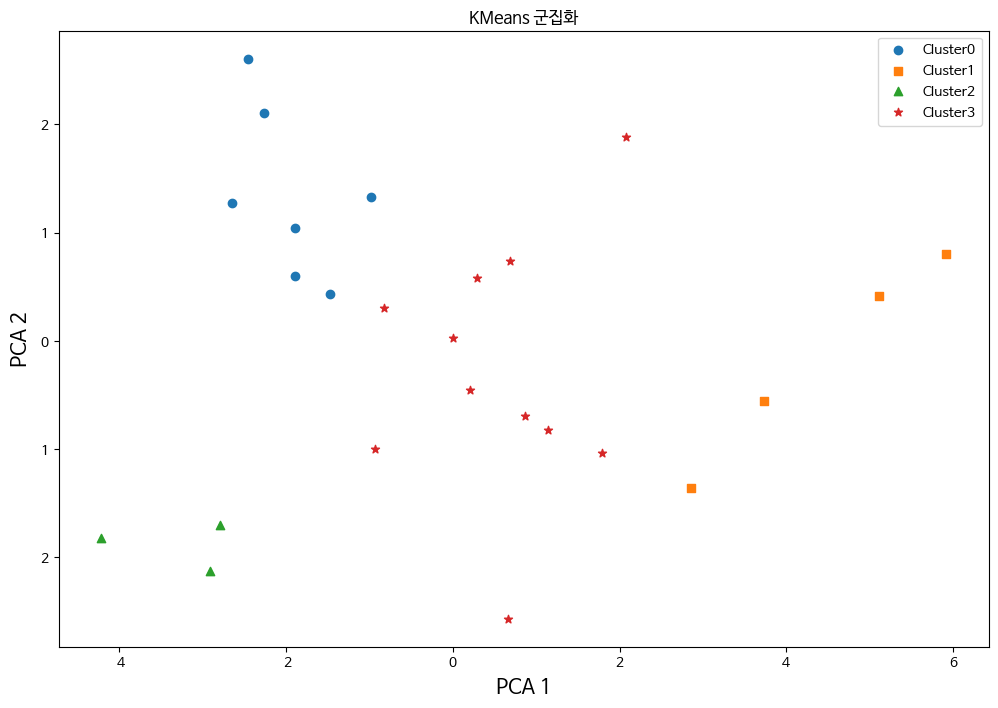

In [26]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2, 3인 경우마다 별도의 인덱스로 추출
marker0_ind = bunsik_std[bunsik_std['cluster'] == 0].index
marker1_ind = bunsik_std[bunsik_std['cluster'] == 1].index
marker2_ind = bunsik_std[bunsik_std['cluster'] == 2].index
marker3_ind = bunsik_std[bunsik_std['cluster'] == 3].index

# 군집 값 0, 1, 2, 3에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (12,8))

plt.scatter(x = bunsik_std.loc[marker0_ind,'pca_x'],y = bunsik_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = bunsik_std.loc[marker1_ind,'pca_x'],y = bunsik_std.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = bunsik_std.loc[marker2_ind,'pca_x'],y = bunsik_std.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x = bunsik_std.loc[marker3_ind,'pca_x'],y = bunsik_std.loc[marker3_ind,'pca_y'], marker='*')

plt.legend(['Cluster0','Cluster1','Cluster2','Cluster3'],fontsize = 10)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2',size = 15)
plt.title('KMeans 군집화')
plt.show()

In [27]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(bunsik_std.loc[bunsik_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(bunsik_std.loc[bunsik_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))
print()

group2 = list(bunsik_std.loc[bunsik_std['cluster'] == 2,'행정구'])
print("군집2: "+ str(group2))
print()

group3 = list(bunsik_std.loc[bunsik_std['cluster'] == 3,'행정구'])
print("군집3: "+ str(group3))

군집0: ['동대문구', '동작구', '서대문구', '성동구', '용산구', '종로구', '중구']

군집1: ['강남구', '강서구', '노원구', '송파구']

군집2: ['강북구', '금천구', '도봉구']

군집3: ['강동구', '관악구', '광진구', '구로구', '마포구', '서초구', '성북구', '양천구', '영등포구', '은평구', '중랑구']


### **2-3. 군집화 평가**

#### **a) 실루엣 계수**

In [28]:
### 실루엣 분석을 위한 API 추가

from sklearn.metrics import silhouette_samples, silhouette_score

In [29]:
### 모든 개별 데이터에 대해 실루엣 계수 값 구하기

score_samples = silhouette_samples(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

silhouette_samples() return 값의 shape (25,)


In [30]:
### 모든 데이터의 평균 실루엣 계수값 구하기

average_score = silhouette_score(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

실루엣 분석 점수: 0.263


In [31]:
### 실루엣 계수 컬럼 추가

bunsik_std['silhouette_coef'] = score_samples
bunsik_std.head(3)

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체),cluster,pca_x,pca_y,silhouette_coef
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687,1,5.920180,0.801839,0.353988
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496,3,1.792963,-1.037083,0.294077
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886,2,-2.797095,-1.702075,0.479593


In [32]:
### 군집별로 실루엣 계수의 평균값 구하기

bunsik_std.groupby('cluster')['silhouette_coef'].mean()

cluster
0    0.296068
1    0.262725
2    0.500710
3    0.177636
Name: silhouette_coef, dtype: float64

- 군집2의 실루엣 계수의 평균이 다른 군집들에 비해 높다.
- 전체 실루엣 계수의 평균값이 낮은 편이다.

#### **b) Davies Bouldin Index**

In [33]:
### Davies Bouldin Index 계산을 위한 API 추가

from sklearn.metrics import davies_bouldin_score

In [34]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(bunsik_std.iloc[:,2:13],bunsik_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.890


- 값이 1 이상으로 조금 높은 편이다.

# **3. 평균 이동**

### **3-1. 평균 이동 군집화 수행**

In [35]:
### 필요한 라이브러리 import

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [36]:
### 데이터 다시 준비

feature_df = df_bunsik.iloc[:,1:] # 로그 변환은 진행됨

scaler = StandardScaler()
bunsik_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구,행정동 컬럼 결합
bunsik_std = pd.concat([pd.DataFrame(df_bunsik[['행정구']]),bunsik_std],axis = 1)
bunsik_std.head(3) # 표준화된 데이터 확인

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886


In [37]:
### 최적 대역폭 계산
# estimate_bandwidth(feature_data): 최적화된 bandwidth를 찾기 위한 함수
# 군집화 시 '행정구','행정동'은 필요 없으므로 제외

h = estimate_bandwidth(bunsik_std.iloc[:,1:])
print('bandwidth 값: ',round(h,3))

bandwidth 값:  3.381


In [38]:
### 평균 이동 군집화 수헹

ms = MeanShift(bandwidth = h)
cluster_labels = ms.fit_predict(bunsik_std.iloc[:,1:])
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1]


- **2개**의 군집으로 분류되는 것을 확인할 수 있다.

In [39]:
### 각 행정구가 어느 군집에 속하는지 확인

bunsik_std['cluster'] = cluster_labels
print(cluster_labels)
print()
print(len(cluster_labels))

[1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

25


In [40]:
### 군집화 결과 확인

df_result = bunsik_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    21
1     4
Name: 행정구, dtype: int64


- 군집0에 데이터가 편향된 것을 확인할 수 있다.

In [41]:
### 차원 축소
# 평면에 시각화를 위해 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(bunsik_std.iloc[:,1:-1])

bunsik_std['pca_x'] = pca_transformed[:,0]
bunsik_std['pca_y'] = pca_transformed[:,1]
bunsik_std.head(3)

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체),cluster,pca_x,pca_y
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687,1,5.920180,0.801839
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496,0,1.792963,-1.037083
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886,0,-2.797095,-1.702075


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


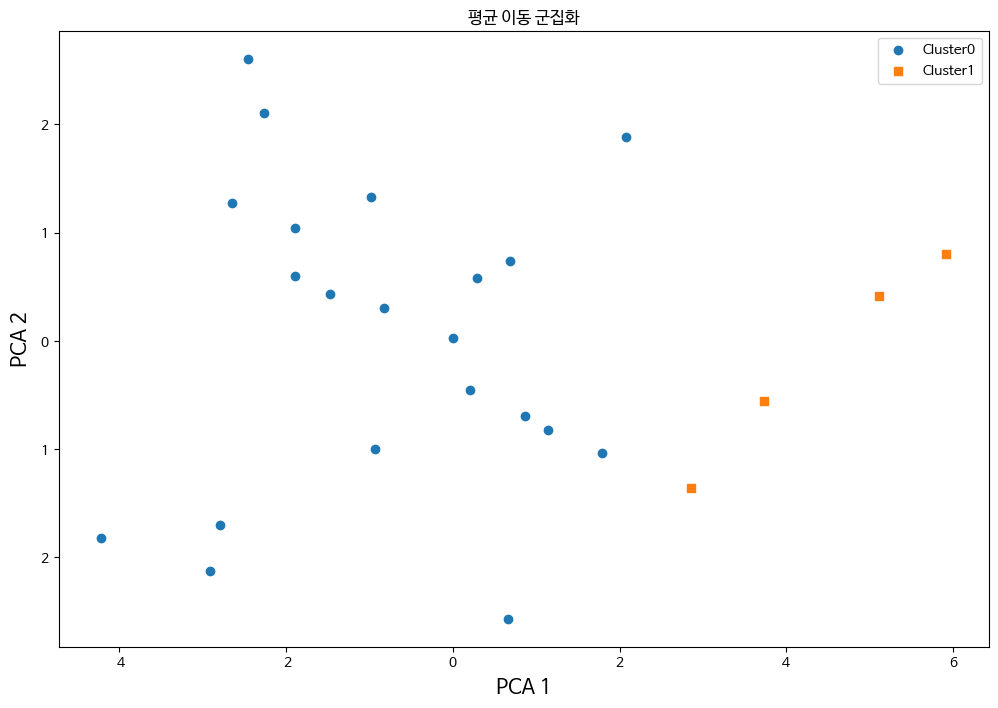

In [42]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2,3,4인 경우마다 별도의 인덱스로 추출
marker0_ind = bunsik_std[bunsik_std['cluster'] == 0].index
marker1_ind = bunsik_std[bunsik_std['cluster'] == 1].index

# 군집 값 0, 1, 2, 3에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (12,8))

plt.scatter(x = bunsik_std.loc[marker0_ind,'pca_x'],y = bunsik_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = bunsik_std.loc[marker1_ind,'pca_x'],y = bunsik_std.loc[marker1_ind,'pca_y'], marker='s')

plt.legend(['Cluster0','Cluster1'],fontsize = 10)
plt.xlabel('PCA 1',size = 15)
plt.ylabel('PCA 2',size = 15)
plt.title('평균 이동 군집화')
plt.show()

In [43]:
### 각 군집에 해당하는 행정동 확인하기

group0 = list(bunsik_std.loc[bunsik_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(bunsik_std.loc[bunsik_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

군집0: ['강동구', '강북구', '관악구', '광진구', '구로구', '금천구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

군집1: ['강남구', '강서구', '노원구', '송파구']


### **3-2. 군집화 평가**

#### **a) 실루엣 계수**

In [44]:
### 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])

### 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

### 실루엣 계수 컬럼 추가
bunsik_std['silhouette_coef'] = score_samples

### 군집별로 실루엣 계수의 평균값 구하기
bunsik_std.groupby('cluster')['silhouette_coef'].mean()

실루엣 분석 점수: 0.366


cluster
0    0.360074
1    0.399811
Name: silhouette_coef, dtype: float64

- 각 군집 간의 실루엣 계수의 평균 간 편차가 작다.
- 전체 실루엣 계수의 평균값이 높은 편은 아니다.

#### **b) Davies Bouldin Index**

In [45]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 0.895


# **4. 병합 군집**

In [46]:
### 데이터 다시 준비

feature_df = df_bunsik.iloc[:,1:] # 로그 변환은 진행됨

scaler = StandardScaler()
bunsik_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구,행정동 컬럼 결합
bunsik_std = pd.concat([pd.DataFrame(df_bunsik[['행정구']]),bunsik_std],axis = 1)
bunsik_std.head(3) # 표준화된 데이터 확인

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886


### **4-1. 여러 클러스터 병합 방식 적용하기**

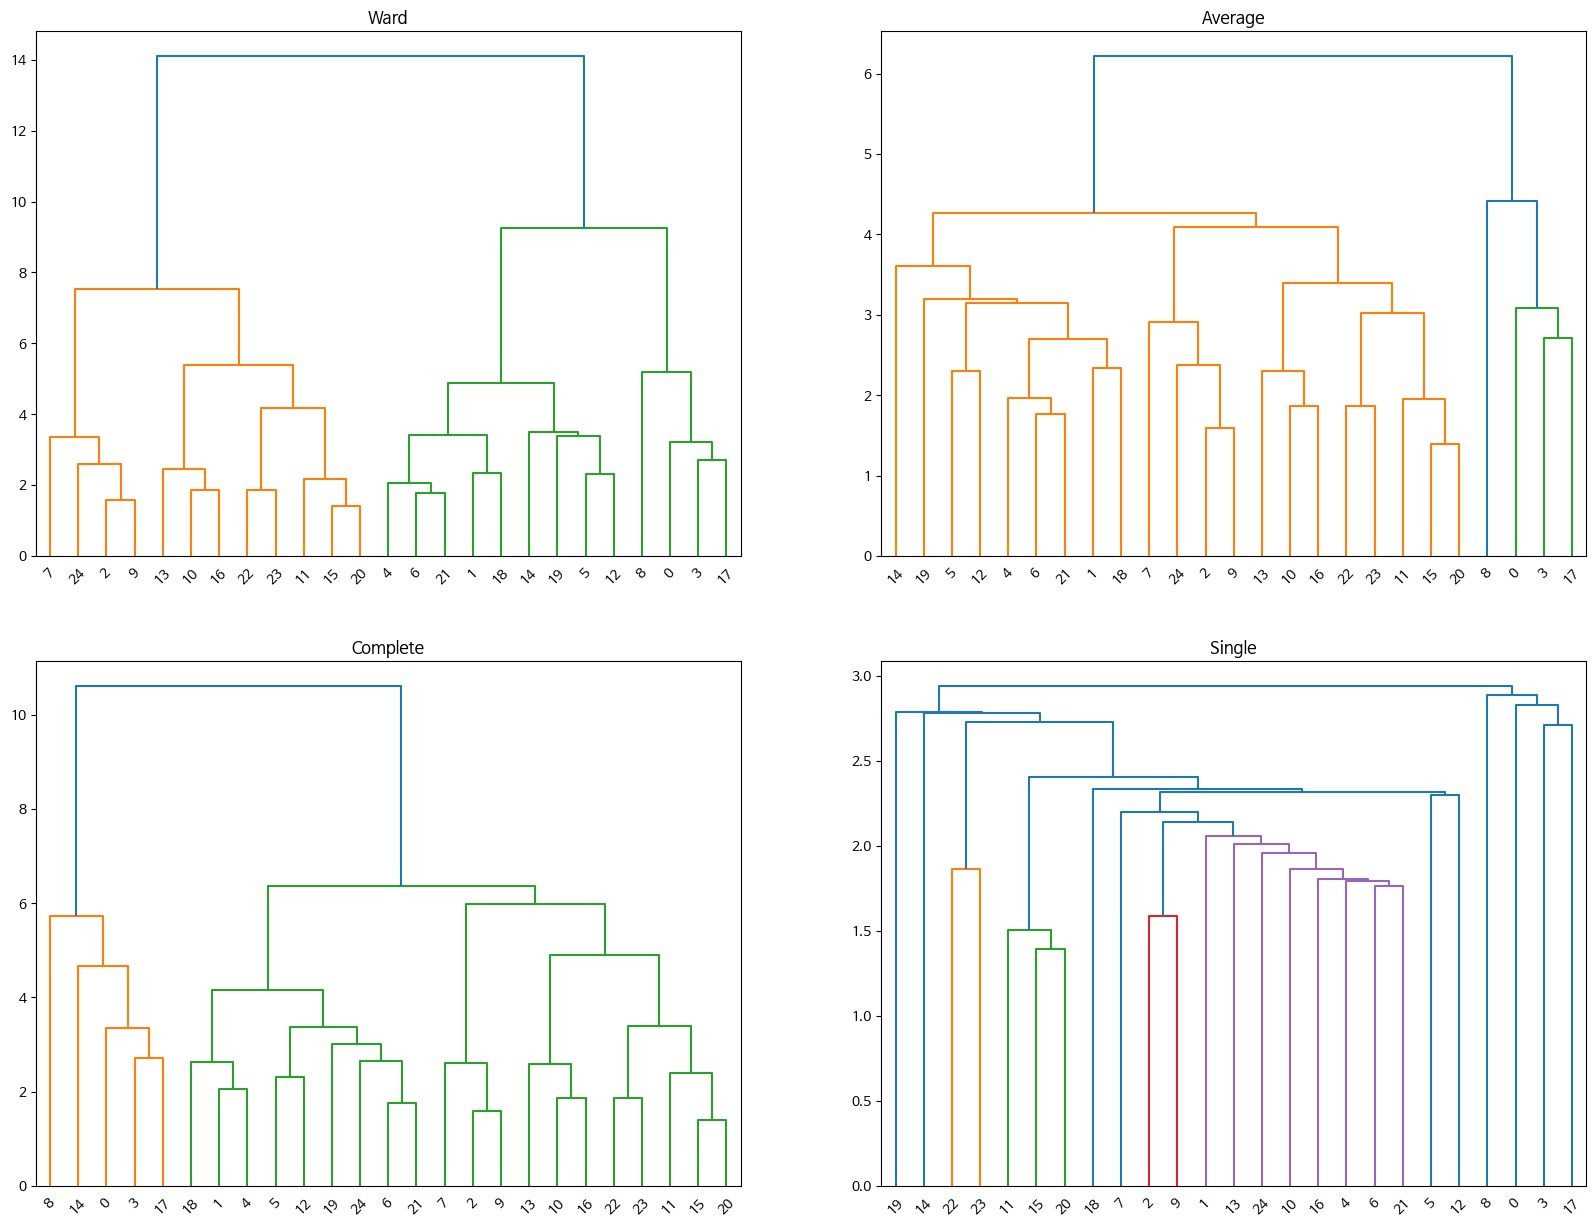

In [47]:
### 필요한 라이브러리 준비
import scipy
import scipy.cluster.hierarchy as sch

### dendrogram 그리기
fig = plt.figure(figsize=(20, 15))

ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Ward')
link1 = sch.linkage(bunsik_std.iloc[:,1:],method = 'ward')
dend1 = sch.dendrogram(link1)

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Average')
link2 = sch.linkage(bunsik_std.iloc[:,1:],method = 'average')
dend2 = sch.dendrogram(link2)

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Complete')
link3 = sch.linkage(bunsik_std.iloc[:,1:],method = 'complete')
dend3 = sch.dendrogram(link3)

ax4 = fig.add_subplot(2,2,4)
ax4.set_title('Single')
link4 = sch.linkage(bunsik_std.iloc[:,1:],method = 'single')
dend4 = sch.dendrogram(link4)

plt.show()

- **ward 연결법**이 군집을 가장 잘 군집을 잘 분류한다고 판단된다.

### **4-2. 병합 군집 수행**
- **ward** 병합 방식 활용
- 군집의 개수를 **2개**로 설정

In [48]:
### 필요한 라이브러리 import
from sklearn.cluster import AgglomerativeClustering

### 군집화(병합 군집)
agg = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
cluster_labels = agg.fit_predict(bunsik_std.iloc[:,2:])
print('cluster labels 유형: ',np.unique(cluster_labels))

cluster labels 유형:  [0 1]


In [49]:
### 각 행정동이 어느 군집에 속하는지 확인

bunsik_std['cluster'] = cluster_labels
print(cluster_labels)
print()
print(len(cluster_labels))

[0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1]

25


In [50]:
### 군집화 결과 확인

df_result = bunsik_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    12
1    13
Name: 행정구, dtype: int64


In [51]:
### 차원 축소
# 평면에 시각화를 위해 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(bunsik_std.iloc[:,1:-1])

bunsik_std['pca_x'] = pca_transformed[:,0]
bunsik_std['pca_y'] = pca_transformed[:,1]
bunsik_std.head(3)

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체),cluster,pca_x,pca_y
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687,0,5.920180,0.801839
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496,0,1.792963,-1.037083
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886,1,-2.797095,-1.702075


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


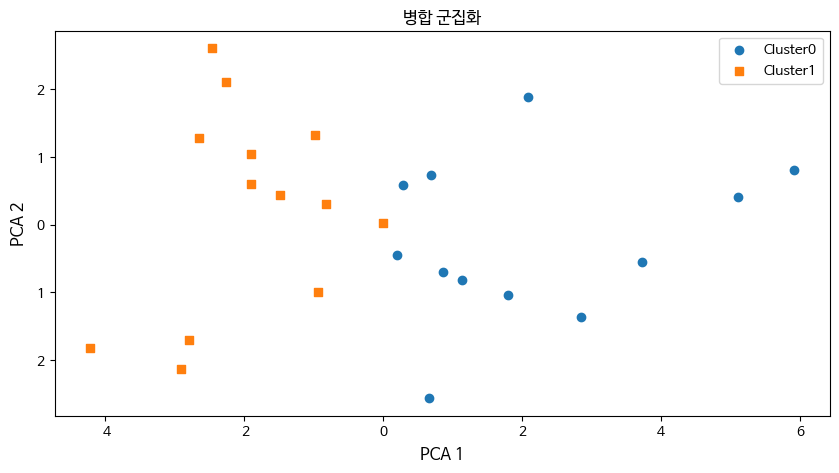

In [52]:
### 군집별 산점도 출력

# 군집 값이 0, 1인 경우마다 별도의 인덱스로 추출
marker0_ind = bunsik_std[bunsik_std['cluster'] == 0].index
marker1_ind = bunsik_std[bunsik_std['cluster'] == 1].index

# 군집 값 0, 1에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (10,5))

plt.scatter(x = bunsik_std.loc[marker0_ind,'pca_x'],y = bunsik_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = bunsik_std.loc[marker1_ind,'pca_x'],y = bunsik_std.loc[marker1_ind,'pca_y'], marker='s')

plt.legend(['Cluster0','Cluster1'],fontsize = 10)
plt.xlabel('PCA 1',size = 12)
plt.ylabel('PCA 2',size = 12)
plt.title('병합 군집화')
plt.show()

In [53]:
### 각 군집에 해당하는 행정동 확인하기

group0 = list(bunsik_std.loc[bunsik_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(bunsik_std.loc[bunsik_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))

군집0: ['강남구', '강동구', '강서구', '관악구', '구로구', '노원구', '마포구', '서초구', '송파구', '양천구', '영등포구', '은평구']

군집1: ['강북구', '광진구', '금천구', '도봉구', '동대문구', '동작구', '서대문구', '성동구', '성북구', '용산구', '종로구', '중구', '중랑구']


### **4-3. 군집화 평가**

#### **a) 실루엣 계수**

In [54]:
### 모든 개별 데이터에 실루엣 계수값 구하기
score_samples = silhouette_samples(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])

### 모든 데이터의 평균 실루엣 계수값 구하기
average_score = silhouette_score(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])
print("실루엣 분석 점수: {0:.3f}".format(average_score))

### 실루엣 계수 컬럼 추가
bunsik_std['silhouette_coef'] = score_samples

### 군집별로 실루엣 계수의 평균값 구하기
bunsik_std.groupby('cluster')['silhouette_coef'].mean()

실루엣 분석 점수: 0.276


cluster
0    0.211283
1    0.335665
Name: silhouette_coef, dtype: float64

- 군집 간의 실루엣 계수 평균의 편차가 있다.
- 전체 실루엣 계수의 평균값이 낮은 편이다.

#### **b) Davies Bouldin Index**

In [55]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 1.187


# **5. GMM**

In [56]:
### 필요한 라이브러리 import

from sklearn.mixture import GaussianMixture

In [57]:
### 데이터 다시 준비

feature_df = df_bunsik.iloc[:,1:] # 로그 변환은 진행됨

scaler = StandardScaler()
bunsik_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구,행정동 컬럼 결합
bunsik_std = pd.concat([pd.DataFrame(df_bunsik[['행정구']]),bunsik_std],axis = 1)
bunsik_std.head(3) # 표준화된 데이터 확인

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886


### **5-1. 군집 개수 선택**

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


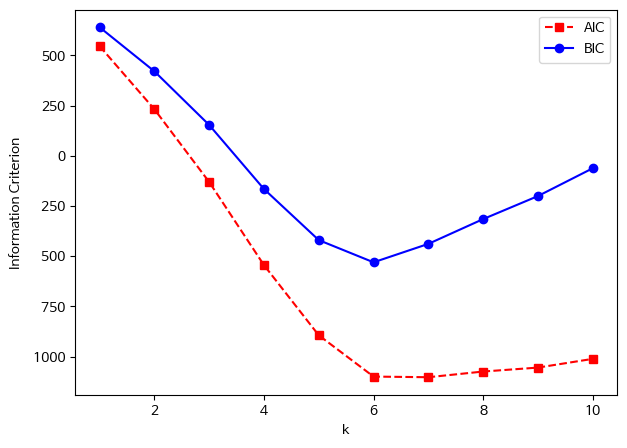

In [58]:
### AIC,BIC
# 군집 개수(k)를 1 ~ 10까지 조정하며 적정 클러스터 개수 찾기

gmm_per_k = [GaussianMixture(n_components = k, n_init = 10, random_state = 0).fit(bunsik_std.iloc[:,1:]) for k in range(1,11)]

bics = [model.bic(bunsik_std.iloc[:,1:]) for model in gmm_per_k] # 모델별 bic
aics = [model.aic(bunsik_std.iloc[:,1:]) for model in gmm_per_k] # 모댈별 aic

plt.figure(figsize = (7,5))
plt.plot(range(1,11),aics,'rs--')
plt.plot(range(1,11),bics,'bo-')
plt.xlabel('k')
plt.ylabel('Information Criterion')
plt.legend(['AIC','BIC'])
plt.show()

- **k = 6**이 최선의 선택으로 보인다.

### **5-2. GMM 군집화 수행**

In [59]:
### 군집화 수행

gmm = GaussianMixture(n_components = 6, random_state = 0).fit(bunsik_std.iloc[:,1:])
gmm_cluster_labels = gmm.predict(bunsik_std.iloc[:,1:])
print('cluster labels 유형: ',np.unique(gmm_cluster_labels))

cluster labels 유형:  [0 1 2 3 4 5]


In [60]:
### 각 행정동이 어느 군집에 속하는지 확인

bunsik_std['cluster'] = gmm_cluster_labels
print(gmm_cluster_labels)
print()
print(len(gmm_cluster_labels))

[3 0 4 3 0 0 2 4 3 4 2 1 0 2 0 1 2 3 0 0 1 0 5 5 4]

25


In [61]:
### 군집화 결과 확인

df_result = bunsik_std.groupby(['cluster'])['행정구'].count()
print(df_result)

cluster
0    8
1    3
2    4
3    4
4    4
5    2
Name: 행정구, dtype: int64


In [62]:
### 차원 축소
# 평면에 시각화를 위해 PCA를 통해 속성을 2개로 차원 축소
# 이후 X좌표, Y좌표로 개별 데이터를 표현

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(bunsik_std.iloc[:,1:-1])

bunsik_std['pca_x'] = pca_transformed[:,0]
bunsik_std['pca_y'] = pca_transformed[:,1]
bunsik_std.head(3)

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체),cluster,pca_x,pca_y
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687,3,5.920180,0.801839
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496,0,1.792963,-1.037083
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886,4,-2.797095,-1.702075


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


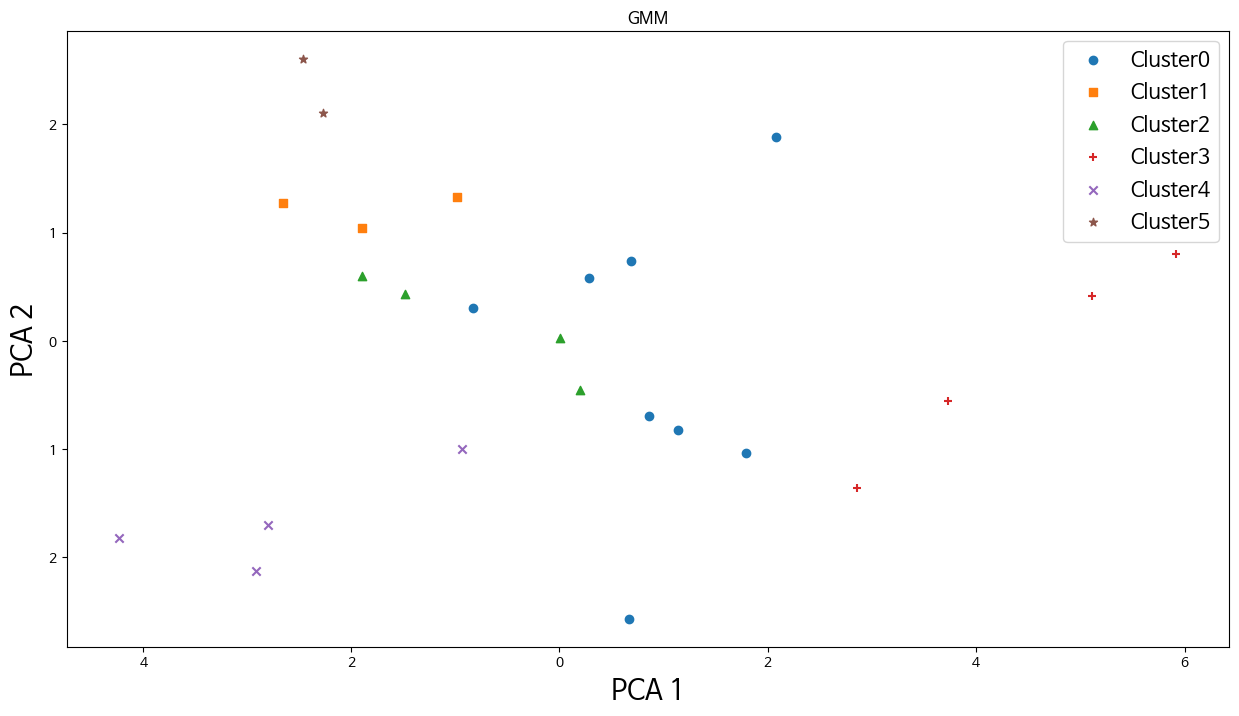

In [63]:
### 군집별 산점도 출력

# 군집 값이 0, 1, 2, 3, 4, 5인 경우마다 별도의 인덱스로 추출
marker0_ind = bunsik_std[bunsik_std['cluster'] == 0].index
marker1_ind = bunsik_std[bunsik_std['cluster'] == 1].index
marker2_ind = bunsik_std[bunsik_std['cluster'] == 2].index
marker3_ind = bunsik_std[bunsik_std['cluster'] == 3].index
marker4_ind = bunsik_std[bunsik_std['cluster'] == 4].index
marker5_ind = bunsik_std[bunsik_std['cluster'] == 5].index

# 군집 값 0, 1, 2, 3, 4, 5에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. 마커 표시
plt.figure(figsize = (15,8))

plt.scatter(x = bunsik_std.loc[marker0_ind,'pca_x'],y = bunsik_std.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x = bunsik_std.loc[marker1_ind,'pca_x'],y = bunsik_std.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x = bunsik_std.loc[marker2_ind,'pca_x'],y = bunsik_std.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x = bunsik_std.loc[marker3_ind,'pca_x'],y = bunsik_std.loc[marker3_ind,'pca_y'], marker='+')
plt.scatter(x = bunsik_std.loc[marker4_ind,'pca_x'],y = bunsik_std.loc[marker4_ind,'pca_y'], marker='x')
plt.scatter(x = bunsik_std.loc[marker5_ind,'pca_x'],y = bunsik_std.loc[marker5_ind,'pca_y'], marker='*')

plt.legend(['Cluster0','Cluster1','Cluster2','Cluster3','Cluster4','Cluster5'],fontsize = 15)
plt.xlabel('PCA 1',size = 20)
plt.ylabel('PCA 2',size = 20)
plt.title('GMM')
plt.show()

In [64]:
### 각 군집에 해당하는 행정구 확인하기

group0 = list(bunsik_std.loc[bunsik_std['cluster'] == 0,'행정구'])
print("군집0: "+ str(group0))
print()

group1 = list(bunsik_std.loc[bunsik_std['cluster'] == 1,'행정구'])
print("군집1: "+ str(group1))
print()

group2 = list(bunsik_std.loc[bunsik_std['cluster'] == 2,'행정구'])
print("군집2: "+ str(group2))
print()

group3 = list(bunsik_std.loc[bunsik_std['cluster'] == 3,'행정구'])
print("군집3: "+ str(group3))
print()

group4 = list(bunsik_std.loc[bunsik_std['cluster'] == 4,'행정구'])
print("군집4: "+ str(group4))
print()

group5 = list(bunsik_std.loc[bunsik_std['cluster'] == 5,'행정구'])
print("군집5: "+ str(group5))

군집0: ['강동구', '관악구', '광진구', '마포구', '서초구', '양천구', '영등포구', '은평구']

군집1: ['동작구', '성동구', '용산구']

군집2: ['구로구', '동대문구', '서대문구', '성북구']

군집3: ['강남구', '강서구', '노원구', '송파구']

군집4: ['강북구', '금천구', '도봉구', '중랑구']

군집5: ['종로구', '중구']


### **5-3. 군집화 평가**

- 가우시안 혼합에서는 클러스터가 타원형이며 크기가 다르므로 관성(이너셔)이나 실루엣 점수를 사용하기 힘들다.
    > Davies-Boudlin Index만을 활용

#### **Davies Bouldin Index**

In [65]:
### Davies Bouldin Index 값 구하기

dbi = davies_bouldin_score(bunsik_std.iloc[:,1:-3],bunsik_std['cluster'])
print("Davies Bouldin Index: {0:.3f}".format(dbi))

Davies Bouldin Index: 1.012


# **6. 베이즈 가우시안 혼합 모델**

### **6-1. 베이즈 가우시안 군집화 수행**

In [66]:
### 필요한 라이브러리 import

from sklearn.mixture import BayesianGaussianMixture

In [67]:
### 데이터 다시 준비

feature_df = df_bunsik.iloc[:,1:] # 로그 변환은 진행됨

scaler = StandardScaler()
bunsik_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구,행정동 컬럼 결합
bunsik_std = pd.concat([pd.DataFrame(df_bunsik['행정구']),bunsik_std],axis = 1)
bunsik_std.head(3) # 표준화된 데이터 확인

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886


In [68]:
### 군집화 수행

bgm = BayesianGaussianMixture(n_components = 25, n_init = 10,random_state = 0)
bgm.fit(bunsik_std.iloc[:,2:])
print(np.round(bgm.weights_,2))

# 최적 클러스터 개수 확인
n_clusters_ = (np.round(bgm.weights_,2) > 0).sum()
n_clusters_

[0.08 0.07 0.07 0.07 0.06 0.06 0.06 0.06 0.05 0.05 0.05 0.04 0.04 0.04
 0.03 0.03 0.03 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.  ]


24

- 너무 많은 군집으로 나누어진다.
- 이하 생략..

# **7. DBSCAN**

### **7-1. 최적 파라미터 탐색**

In [69]:
### 필요한 라이브러리 import

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [70]:
### 데이터 다시 준비

feature_df = df_bunsik.iloc[:,1:] # 로그 변환은 진행됨

scaler = StandardScaler()
bunsik_std = pd.DataFrame(scaler.fit_transform(feature_df),columns = feature_df.columns)

# 결과 확인을 위해 행정구,행정동 컬럼 결합
bunsik_std = pd.concat([pd.DataFrame(df_bunsik['행정구']),bunsik_std],axis = 1)
bunsik_std.head(3) # 표준화된 데이터 확인

,행정구,분식,총생활인구수_평일,40~50대 생활인구_평일,대학교(전체),초중고(전체),고등학교,평균소득금액,폐업점포영업개월,10대,총인구,역(전체)
0,강남구,2.289636,2.126286,2.049937,-0.539150,1.379286,1.782464,1.999953,-1.782919,2.137795,1.198274,2.580687
1,강동구,0.604598,0.754698,0.839245,-1.618975,0.437794,0.232495,0.948894,-1.197103,0.615839,0.626343,-0.577496
2,강북구,-0.856633,-1.243108,-1.369726,-0.539150,-1.092131,-1.123727,-1.679592,-1.197103,-0.727745,-0.719299,-0.727886


#### **✔ Eps 구하기**

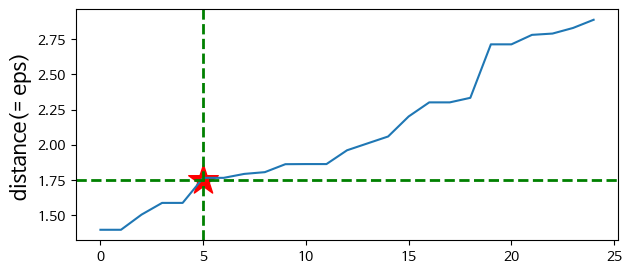

In [71]:
### K-dist 계산
# 유클리디안(euclidean) 거리

neigh = NearestNeighbors(n_neighbors = 2) # 두 개의 데이터, 1개의 거리
nbrs = neigh.fit(bunsik_std.iloc[:,1:])
# 각 개체마다 거리를 계산해서 거리와 그 떄의 index 반환
distances, indices = nbrs.kneighbors(bunsik_std.iloc[:,1:]) 

# 거리 정렬
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

### Plotting
plt.figure(figsize = (7,3))
plt.plot(distances)
plt.axvline(x = 5, color = 'g', lw = 2, ls='--')
plt.axhline(y = 1.75, color = 'g', lw = 2, ls='--')
plt.scatter(5,1.75,marker = '*',color = 'r',s = 500)
plt.ylabel('distance(= eps)',fontsize = 15)
plt.show()

- 급격히 dist가 증가한 지점의 distance인 **1.7**를 **eps**로 설정

### **7-2. DBSCAN 군집화 수행**

- eps = 1.75
- min_points를 2로 설정
- min_sample = 3(min points + 1)

In [72]:
### DBSCAN 군집화 수행

dbscan = DBSCAN(eps = 1.75, min_samples = 3, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(bunsik_std.iloc[:,1:])
print('cluster labels 유형: ',np.unique(dbscan_labels))

cluster labels 유형:  [-1  0]


- 단일 군집으로 군집화되는 것을 확인할 수 있다.
- 이하 생략..

# **8. 결과 정리**

In [73]:
result = [['K-Means',0.263,0.890],
         ['평균 이동',0.366,0.911],
         ['병합 군집',0.276,1.221],
         ['GMM','-',1.012],
         ['베이즈 가우시안','-','-'],
         ['DBSCAN','-','-']]
cols = ['Algorithm','실루엣 점수','DBI']
result_df = pd.DataFrame(result,columns = cols)
result_df.sort_values(by = ['실루엣 점수','DBI'],ascending = [False, True]).reset_index(drop = True)

,Algorithm,실루엣 점수,DBI
0,GMM,-,1.012
1,베이즈 가우시안,-,-
2,DBSCAN,-,-
3,평균 이동,0.366,0.911
4,병합 군집,0.276,1.221
5,K-Means,0.263,0.89


- **병합 군집** 군집화 결과가 가장 유의미하다고 판단된다.